In [1]:
#LINEAR REGRESSION 
#VEHICLE PRICE PRODUCTION 

In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od

In [5]:
#DOWLODING DATASETS
od.download("https://www.kaggle.com/nehalbirla/motorcycle-dataset")

Skipping, found downloaded files in ".\motorcycle-dataset" (use force=True to force download)


In [6]:
dataset = pd.read_csv('motorcycle-dataset/BIKE DETAILS.csv')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [8]:
#no of rows and columns 
dataset.shape

(1061, 7)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

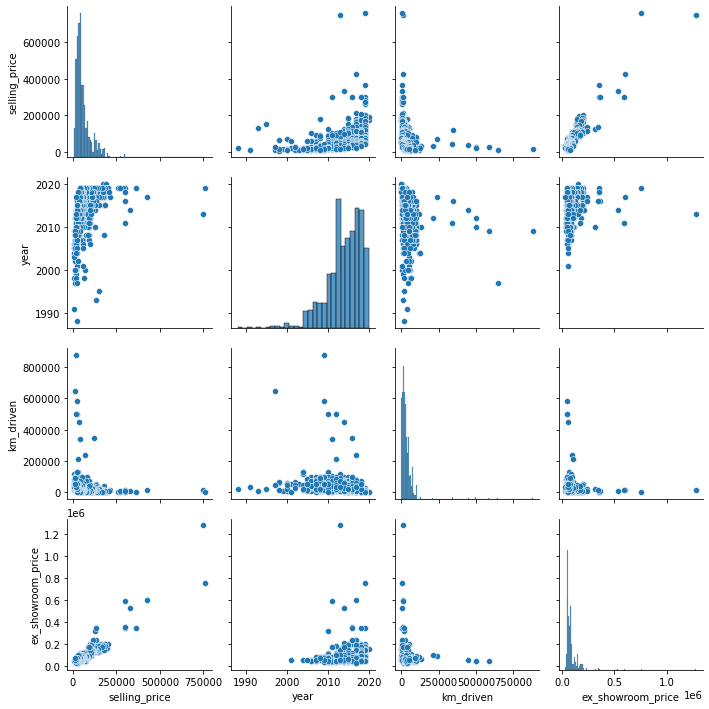

In [10]:
#ploting graph 
sns.pairplot(dataset)

C:\Users\chetw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


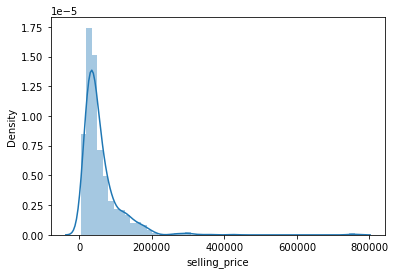

In [11]:
sns.distplot(dataset['selling_price']);

In [12]:
if dataset.duplicated().sum() > 0:
    print("There is redundancy")
else:
    print("There is no redundancy")

There is redundancy


In [13]:
dataset.shape[0]

1061

In [14]:
dataset = dataset.drop_duplicates()

In [15]:
dataset.shape[0]

1055

In [16]:
#to check no of missing values
dataset.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    433
dtype: int64

In [17]:
#handling missing values
dataset['ex_showroom_price'] = dataset['ex_showroom_price'].fillna(dataset['ex_showroom_price'].mean())
dataset.isnull().sum()

C:\Users\chetw\AppData\Local\Temp\ipykernel_5472\2453733529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ex_showroom_price'] = dataset['ex_showroom_price'].fillna(dataset['ex_showroom_price'].mean())


name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

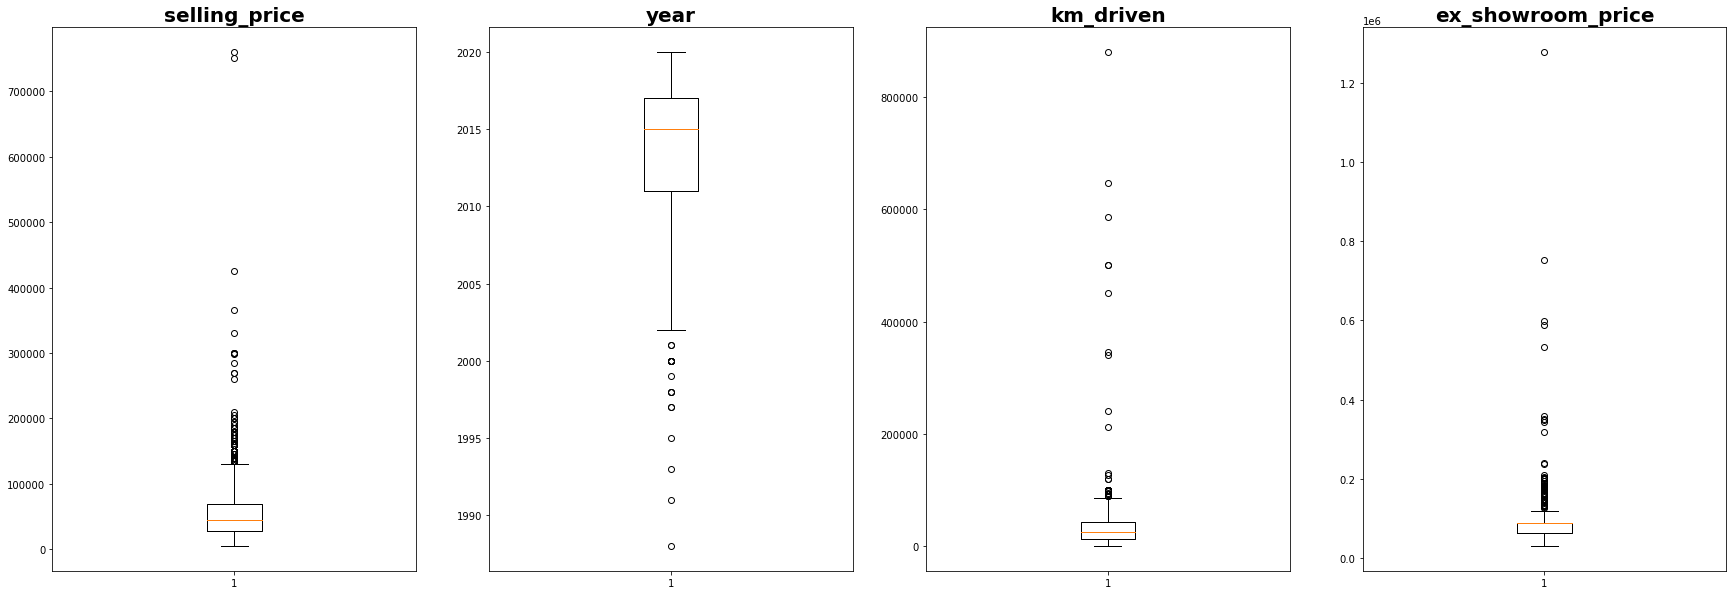

In [18]:
#detecting outliers 
data_numeric = dataset.select_dtypes(include=np.number)
fig, axs = plt.subplots(nrows = 1, ncols = len(data_numeric.columns), figsize=(30,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(data_numeric.iloc[:,i])
    ax.set_title(data_numeric.columns[i], fontsize=20, fontweight='bold')



In [19]:
def outliers(column):  
  q1 = dataset[column].quantile(0.25)
  q3 = dataset[column].quantile(0.75)
  iqr =  q3 - q1
  upper_range = q3 + (1.5 * iqr)
  lower_range = q1 - (1.5 * iqr)
  count_outlier = 0
  for i in dataset[column]:
    if i < lower_range or i > upper_range:
      count_outlier += 1
  return count_outlier

for col in data_numeric:
  print('Outlier from', col,':',outliers(col))




Outlier from selling_price : 87
Outlier from year : 18
Outlier from km_driven : 38
Outlier from ex_showroom_price : 83


In [20]:
q = dataset['selling_price'].quantile(0.97)
dataset = dataset[dataset['selling_price'] < q]

dataset = dataset[dataset['km_driven'] < 100000]

q = dataset['year'].quantile(0.01)
dataset = dataset[dataset['year'] > q]

In [21]:
dataset

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1,Honda Dio,45000,2017,Individual,1st owner,5650,88060.794212
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,88060.794212
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.000000
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.000000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.000000


In [22]:
#encoding the seller type coloumn 
dataset.replace({'seller_type' : {'Individual' : 1 , 'Dealer' : 2}},inplace = True)
#encoding owner column 
dataset.replace({'owner' : {'1st owner' : 1 , '2nd owner' : 2 , '3rd owner' : 3 , '4th owner' : 4}} , inplace = True)

In [23]:
#importing lib to split data
from sklearn.model_selection import train_test_split

C:\Users\chetw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 53796.10 and sigma = 35135.11



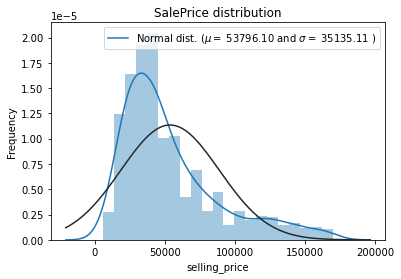

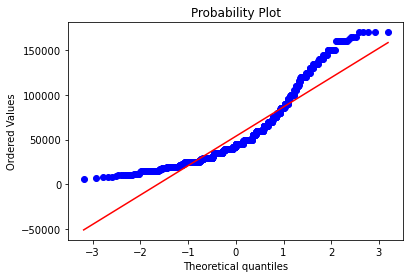

In [24]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(dataset['selling_price'] , fit=norm);

(mu, sigma) = norm.fit(dataset['selling_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dataset['selling_price'], plot=plt)
plt.show()

C:\Users\chetw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 10.70 and sigma = 0.63



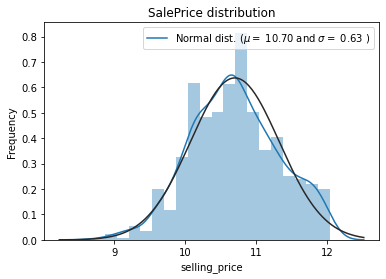

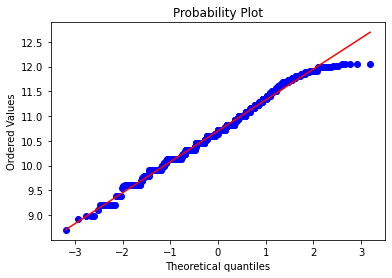

In [25]:
#gradient descent algorithm
dataset['selling_price'] = np.log1p(dataset['selling_price'])

sns.distplot(dataset['selling_price'] , fit=norm);

(mu, sigma) = norm.fit(dataset['selling_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(dataset['selling_price'], plot=plt)
plt.show()

In [26]:
x = dataset.drop(['name' ,'selling_price'],axis = 1)
y = dataset['selling_price']

In [27]:
x

,year,seller_type,owner,km_driven,ex_showroom_price
1,2017,1,1,5650,88060.794212
2,2018,1,1,12000,148114.000000
3,2015,1,1,23000,89643.000000
4,2011,1,2,21000,88060.794212
5,2010,1,1,60000,53857.000000
...,...,...,...,...,...
1055,2017,1,1,35000,32000.000000
1057,2012,1,1,33000,51000.000000
1058,2013,1,2,35000,57000.000000
1059,2009,1,1,53000,58000.000000


In [28]:
y

1       10.714440
2       11.918397
3       11.082158
4        9.903538
5        9.798183
          ...    
1055     9.798183
1057     9.680406
1058     9.615872
1059     9.392745
1060     9.210440
Name: selling_price, Length: 976, dtype: float64

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [30]:
x_train

,year,seller_type,owner,km_driven,ex_showroom_price
323,2016,1,1,31000,88060.794212
166,2010,1,1,32000,88060.794212
887,2017,2,1,7850,85011.000000
929,2014,1,1,38000,88060.794212
939,2011,1,3,70000,88060.794212
...,...,...,...,...,...
582,2011,1,2,30000,64589.000000
639,2013,1,1,20000,76572.000000
534,2019,1,1,3000,88060.794212
574,2009,1,1,86000,88060.794212


In [31]:
x_test

,year,seller_type,owner,km_driven,ex_showroom_price
1013,2015,1,1,45000,99000.000000
157,2007,1,1,52000,88060.794212
500,2011,1,1,45000,42859.000000
510,2016,1,1,26000,117926.000000
187,2007,1,1,80000,85011.000000
...,...,...,...,...,...
270,2010,1,1,31195,88060.794212
555,2017,1,1,33000,66697.000000
956,2015,1,1,48000,64589.000000
395,2011,1,1,35600,88060.794212


In [32]:
y_train

323    11.156265
166    10.043293
887    11.184435
929    10.463132
939    10.308986
         ...    
582    10.126671
639    10.714440
534    11.350418
574     9.615872
182    10.621352
Name: selling_price, Length: 780, dtype: float64

In [33]:
y_test

1013    10.819798
157     10.819798
500     10.308986
510     11.350418
187     10.126671
          ...    
270      9.903538
555     10.621352
956     10.819798
395     10.463132
665     10.085851
Name: selling_price, Length: 196, dtype: float64

In [34]:
#model training
from sklearn.linear_model import LinearRegression

In [35]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [36]:
pred = lin_reg_model.predict(x_test)

In [37]:
pred

array([10.83676128,  9.96789231,  9.97735863, 11.19543802,  9.79233381,
       10.80363231, 11.05095269, 10.13258774, 10.08065926, 10.28095248,
       10.55759543,  9.56273645, 10.85945311, 10.77709903, 11.28970543,
       11.25925475, 10.82074663, 10.48092155, 10.31863464, 11.20303534,
       11.18708598, 10.31558905, 10.34647139, 11.17113661, 10.17425264,
        9.13589726, 10.55541991, 10.76949237, 11.03501161, 11.43945324,
       10.91965646, 11.19145862, 10.59824326, 10.58538213,  9.88339774,
       10.19061277, 10.96147031, 11.1791113 , 10.24312288, 10.65272291,
       10.23321903, 11.15251713, 10.48682207, 10.97644425, 10.3852934 ,
       10.58387568, 10.59046772, 11.99331987, 10.30764938, 11.98215544,
       10.33009196, 10.23883243, 10.5844423 ,  9.68003777, 10.928139  ,
        9.99955421, 10.256473  , 10.11143656, 10.41364879,  9.61093139,
       10.43131583, 11.20303534, 10.82739883, 10.66344528, 10.04763718,
       11.19506066, 11.28970543, 10.30835446, 11.10305394, 11.31

In [38]:
y_test

1013    10.819798
157     10.819798
500     10.308986
510     11.350418
187     10.126671
          ...    
270      9.903538
555     10.621352
956     10.819798
395     10.463132
665     10.085851
Name: selling_price, Length: 196, dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  

    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred)

MSE:-  0.1184874077944441
RMSE:-  0.3442199991203941
R2_score:-  0.696679713190502


In [40]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(x_train, y_train )
ri = Ridge().fit(x_train, y_train ) 

la_p = la.predict(x_test) 
ri_p = ri.predict(x_test)

In [41]:
calculate_metrics(y_test, la_p)

MSE:-  0.21477566243221832
RMSE:-  0.46343895221724546
R2_score:-  0.45018785758519164


In [42]:
calculate_metrics(y_test, ri_p)

MSE:-  0.11849228640667568
RMSE:-  0.34422708552157205
R2_score:-  0.6966672242510539


In [43]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.049 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.019 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.007 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.028 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.016 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.067 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.043 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.031 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.052 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.039 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.058 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [44]:
svmp = grid.predict(x_test)

In [45]:
calculate_metrics(y_test, svmp)

MSE:-  0.35517465426185596
RMSE:-  0.5959653129686794
R2_score:-  0.09077529837544496


In [46]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(x_train, y_train) 
svr_pred = svr.predict(x_test) 
calculate_metrics(y_test, svr_pred)

MSE:-  0.3550211027952831
RMSE:-  0.5958364731998899
R2_score:-  0.09116838044001097


In [47]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")